# importing json file


import json per la llibreria que treballa amb json

In [1]:
import json
import numpy as np #aqui hi ha les estructures de dades que faig servir
import matplotlib.pyplot as plt #per dibuixar
import scipy.io as sio #el input output d'audio (wavfile.read)
from IPython.display import Audio #el reproductor d'audio
from numpy.fft import fft, ifft #podria fer numpy.fft en comptes de fer aquest import
from wav2vec import cutvowel, wav2vec #el nostre modul
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn import svm




importo el meu fitxer json

In [2]:
with open("/home/itibcn/Desktop/MachineLearningClassic/PracticaAudio/Audio/vocals.json") as f:
    data = json.load(f)
print(data[2])

{'Start': 0.9, 'End': 0.99, 'Vocal': 'A'}


In [3]:
start = data[30]["Start"] #Seleccionem l'START de la cel·la 30 de l'arxiu de vocals
end = data[30]["End"] #Seleccionem l'END de la cel·la 30 de l'arxiu de vocals
print(float(start)) #Instant de l'start
print(float(end)) # Instant de l'end



5.85
5.91


les llibreries que necesito per utilitzar i processar audio

carrego el fitxer d'audio

1920
48000
[ 906 1077 1233 ... 4546 4619 4514]
400.0 Hz
550.0 Hz
1800.0 Hz
 
16
22
72
1920
48000
[4294 4055 3872 ... -113  -73  -34]
375.0 Hz
525.0 Hz
1675.0 Hz
 
15
21
67
4320
48000
[-1328 -1229 -1138 ...  -993 -1499 -1361]
388.8888888888889 Hz
233.33333333333334 Hz
533.3333333333334 Hz
 
35
21
48
2399
48000
[-93 -59 -35 ... 465 310  93]
300.1250521050438 Hz
440.1834097540642 Hz
1800.7503126302627 Hz
 
15
22
90
2401
48000
[-2395 -2438 -2429 ... 11538 11780 12036]
299.875052061641 Hz
439.8167430237401 Hz
579.7584339858392 Hz
 
15
22
29
2880
48000
[6189 5659 5118 ... -807 -847 -883]
316.6666666666667 Hz
466.6666666666667 Hz
616.6666666666666 Hz
 
19
28
37
4320
48000
[  666   532   353 ... -3322 -3199 -3113]
288.8888888888889 Hz
433.3333333333333 Hz
577.7777777777778 Hz
 
26
39
52
1920
48000
[-3575 -3432 -3226 ... -3810 -3533 -3285]
375.0 Hz
1775.0 Hz
1925.0 Hz
 
15
71
77
2400
48000
[-2216 -2922 -3459 ...  -791  -769  -736]
340.0 Hz
480.0 Hz
620.0 Hz
 
17
24
31
3360
48000
[-1665 -1356 -1

'\nif data[select[\'Vocal\']] == \'A\':\n    print("Max1 a: " + str(maxim1))\n    print("Max3 a: " + str(maxim3))\n\nelif data[select[\'Vocal\']] == \'E\':\n    print("Max1 e: " + str(maxim1))\n    print("Max3 e: " + str(maxim3))\n\nelif data[select[\'Vocal\']] == \'I\':\n    print("Max1 i: " + str(maxim1))\n    print("Max3 i: " + str(maxim3))\n\nelif data[select[\'Vocal\']] == \'O\':\n    print("Max1 o: " + str(maxim1))\n    print("Max3 o: " + str(maxim3))\n\nelif data[select[\'Vocal\']] == \'U\':\n    print("Max1 u: " + str(maxim1))\n    print("Max2 u: " + str(maxim2))\n'

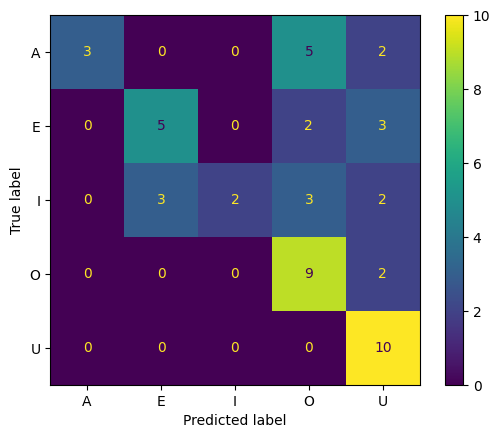

In [ ]:
def frequencia(muestra, Fs, muestraTotal):
    return muestra * Fs/muestraTotal

def mostraFreq(freq, Fs, muestraTotal):
    return freq * muestraTotal / Fs


def maxims():

    llistavocals = []
    llistamaxims = []
    arraymaxims = []
    
    Fs, audio = sio.wavfile.read("/home/itibcn/Desktop/MachineLearningClassic/PracticaAudio/AudioClasse.wav")
    #Fs, audio = cutvowel("vowels/alex.wav"), float(data[select]["start"]), float(data[select]["end"]))

    for select in range(len(data)): #Parametre del dataset
        
        
        #print(data[select]['Vocal'])
        #print(' ')
        start = float(data[select]["Start"])
        #print(start)
        end=float(data[select]["End"])
        #print(end)
        #print(len(audio)) #per mirar si és estero o mono

        cut = audio[int(start*Fs):int(end*Fs)]

        #print("Llargada audio: " + str(len(cut)))
        #print(Fs)
        #print(type(audio))
        #print(type(audio[0]))

        #start=4.4 #realment ho agafariem del fitxer json
        #end=4.6

        #framesentrada = int(float(start)*Fs) #calculem la mostra d'entrada
        #framesalida = int(float(end)*Fs)
        #cut=audio[framesentrada:framesalida] #retallem

        #cut = audio
        #data[select]["vocal"]
    
        #print(' ')

        #Audio retallat
        Audio(cut, rate=Fs)

        #dibuixem l'audio retallat
        #plt.figure()
        #plt.plot(cut)
        #plt.title("")
        #plt.xlabel("time")
        #plt.ylabel("Amplitud")
        #plt.show()

        #Dificil entendre algo. mirem fourier
        fourier = fft(cut)
        #plt.figure()
        #plt.plot(fourier)
        #plt.title("FFT")
        #plt.xlabel("frequency")
        #plt.ylabel("Amplitud")
        #plt.show()

        #només importa el que pasa a prop de zero
        #Fsmall = fourier[0:300]
        Fsmall = fourier[0:int(mostraFreq(3000, Fs, len(cut)))]
        #plt.figure()
        #plt.plot(Fsmall)
        #plt.title("FFT")
        #plt.xlabel("frequency")
        #plt.ylabel("Amplitud")
        #plt.show()

        #No m'importa la fase, només el módul.
        toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))
        #plt.figure()
        #plt.plot(toprocess)
        #plt.show()


        #-----------------------------------------------------------------------
        #Aplico un filtre per quedar eliminar soroll

        #filter = 50
        filter = int(mostraFreq(345, Fs, len(cut)))
        out = np.zeros(len(toprocess)-filter, dtype=np.float64)
        for i in range(len(toprocess)-filter):
            for j in range(filter):
                out[i] += toprocess[i+j]

                
        out[0:15] = 0
                
        #plt.figure()
        #plt.plot(out)
        #plt.show()

        np.argmax(out)

        #----------------------------------------------------------------------

        #filter2 = 25
        filter2 = int(mostraFreq(150, Fs, len(cut)))
        #print("FILTRO2: " + str(filter2))
        
        maxim1 = np.argmax(out)

        filmin = filter2
        if maxim1 < filter2:
            filmin = maxim1

        out[maxim1-filmin:maxim1+filter2] = 0
        #plt.figure()
        #plt.plot(out)
        #plt.show()

        maxim2 = np.argmax(out)
        #print(maxim2)

        out[maxim2-filter2:maxim2+filter2] = 0
        #plt.figure()
        #plt.plot(out)
        #plt.show()


        maxim3 = np.argmax(out)
        #print(maxim3)

        out[maxim3-filter2:maxim3+filter2] = 0
        #plt.figure()
        #plt.plot(out)
        #plt.show()

        #---------------------------------------------------------------------

        print(fourier.size)
        print(Fs)
        print(cut)
        print((maxim1)*Fs/fourier.size, "Hz")
        print((maxim2)*Fs/fourier.size, "Hz")
        print((maxim3)*Fs/fourier.size, "Hz")
        
       
        match data[select]['Vocal']:
            case 'A':
                llistamaxims.append(maxim1)
                llistamaxims.append(maxim3)
            case 'E':
                llistamaxims.append(maxim1)
                llistamaxims.append(maxim3)
            case 'I':
                llistamaxims.append(maxim1)
                llistamaxims.append(maxim3)
            case 'O':
                llistamaxims.append(maxim1)
                llistamaxims.append(maxim3)
            case 'U':
                llistamaxims.append(maxim1)
                llistamaxims.append(maxim2)

        
        arraymaxims.append(llistamaxims)

        llistavocals.append(data[select]['Vocal'])

        llistamaxims = []

        print(' ')
        print(maxim1)
        print(maxim2)
        print(maxim3)


    return np.array(arraymaxims), np.array(llistavocals)


temps, vocals = maxims()
clf = svm.SVC()

clf.fit(temps, vocals)

y_pred = clf.predict(temps)
acc = accuracy_score(vocals, y_pred)
print(acc)

ConfusionMatrixDisplay.from_estimator(clf, temps, vocals)

"""
if data[select['Vocal']] == 'A':
    print("Max1 a: " + str(maxim1))
    print("Max3 a: " + str(maxim3))

elif data[select['Vocal']] == 'E':
    print("Max1 e: " + str(maxim1))
    print("Max3 e: " + str(maxim3))

elif data[select['Vocal']] == 'I':
    print("Max1 i: " + str(maxim1))
    print("Max3 i: " + str(maxim3))

elif data[select['Vocal']] == 'O':
    print("Max1 o: " + str(maxim1))
    print("Max3 o: " + str(maxim3))

elif data[select['Vocal']] == 'U':
    print("Max1 u: " + str(maxim1))
    print("Max2 u: " + str(maxim2))
"""


1920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


/tmp/ipykernel_20973/3072696405.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] += fft_audio[i*sample_rate+j]


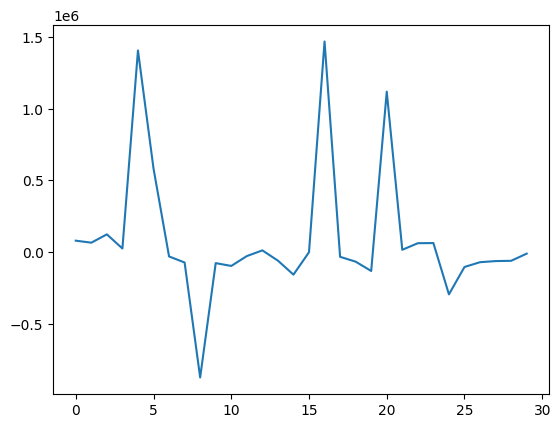

1920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


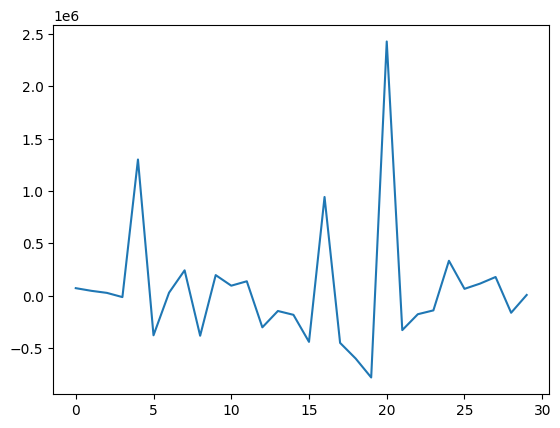

4320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


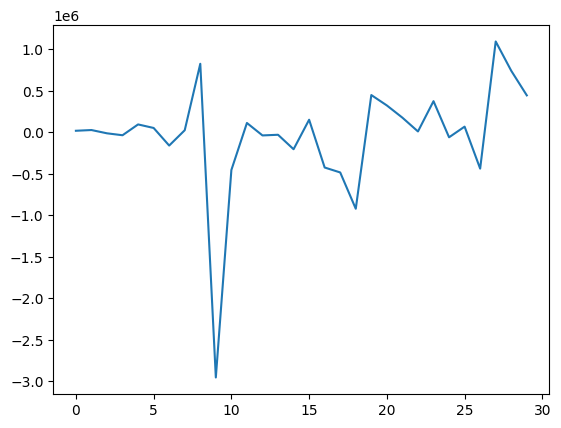

2399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


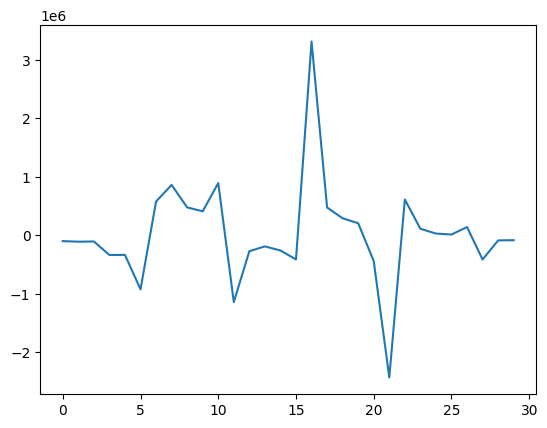

2401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


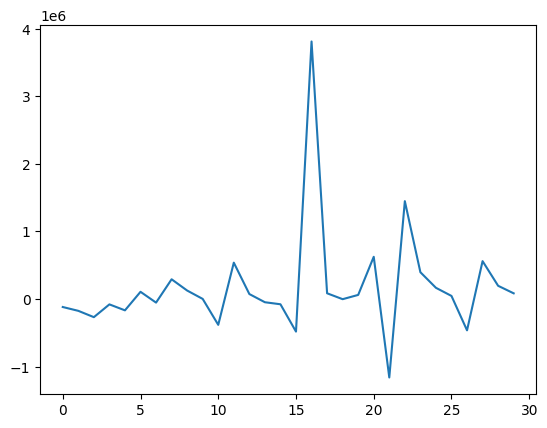

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


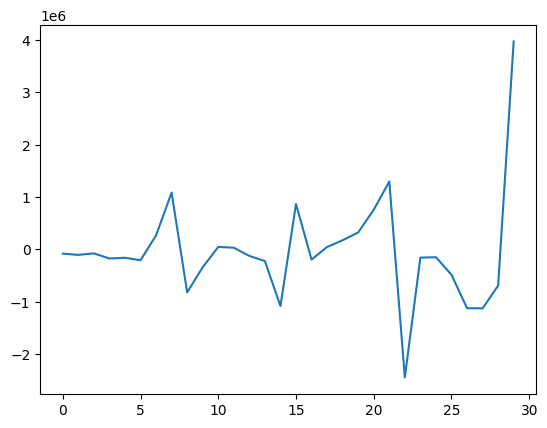

4320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


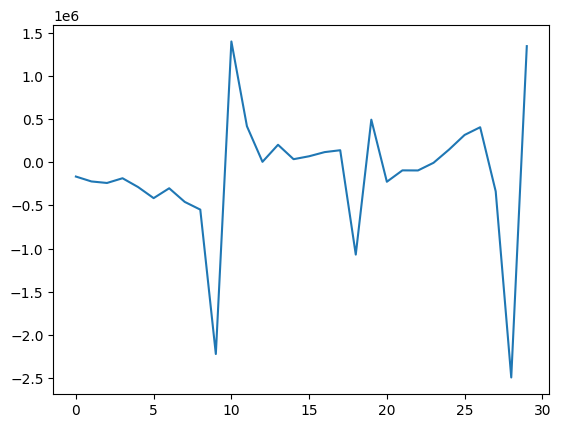

1920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


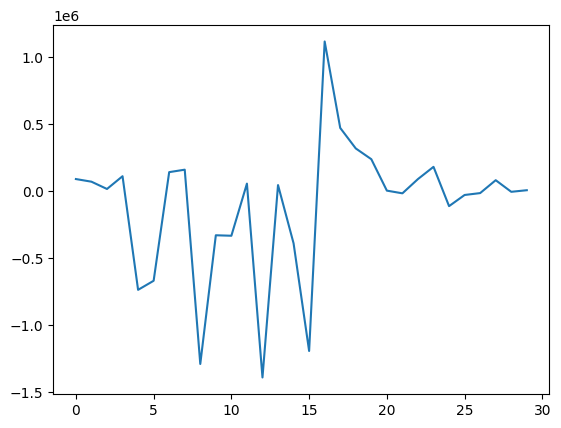

2400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


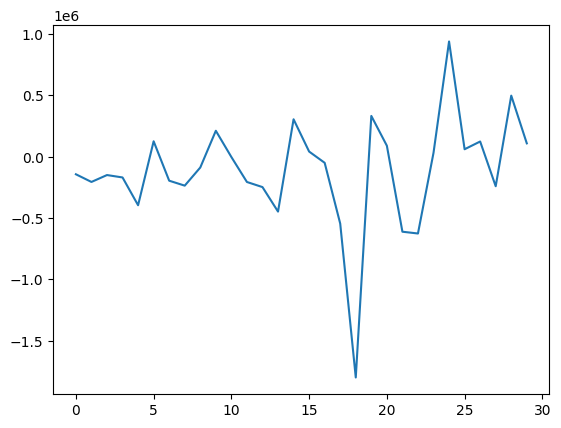

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


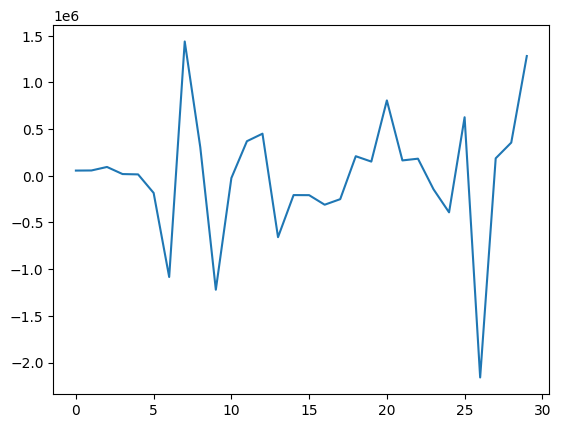

2401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


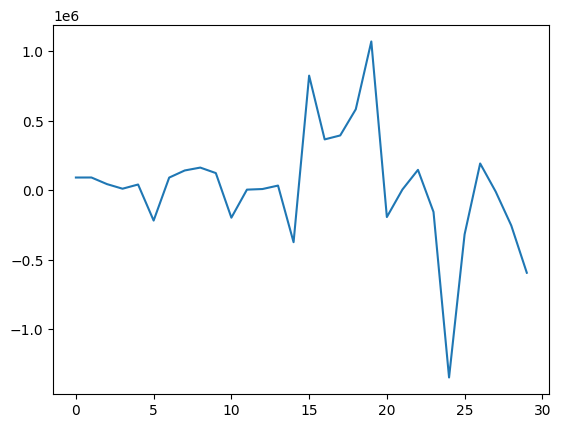

2640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


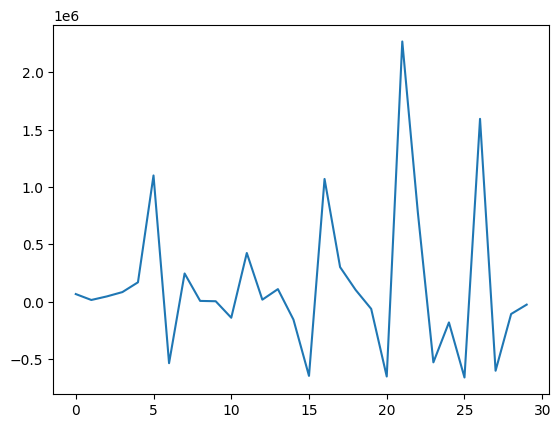

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


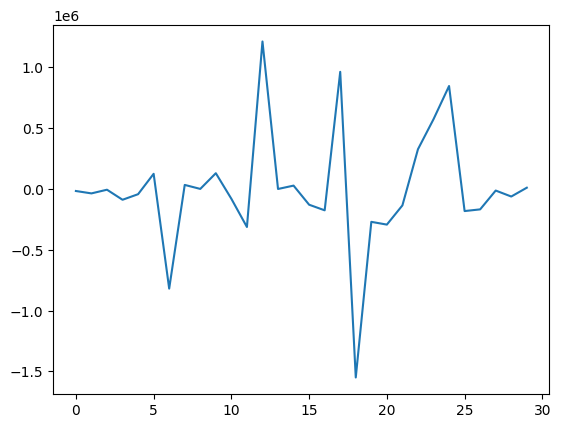

1920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


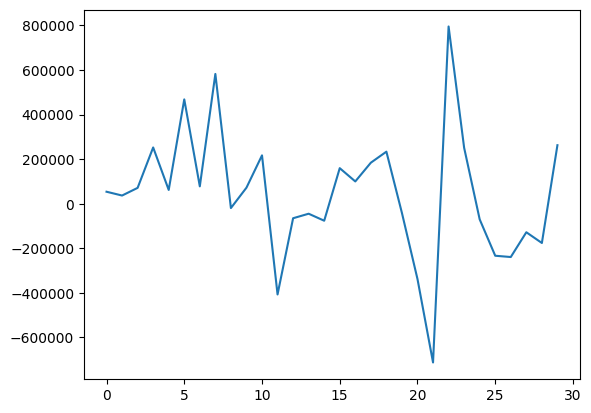

2400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


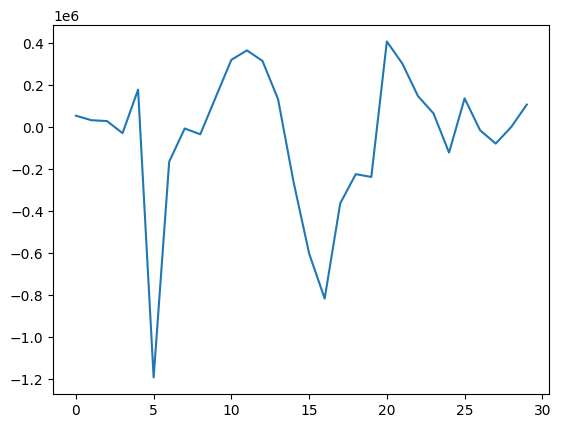

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


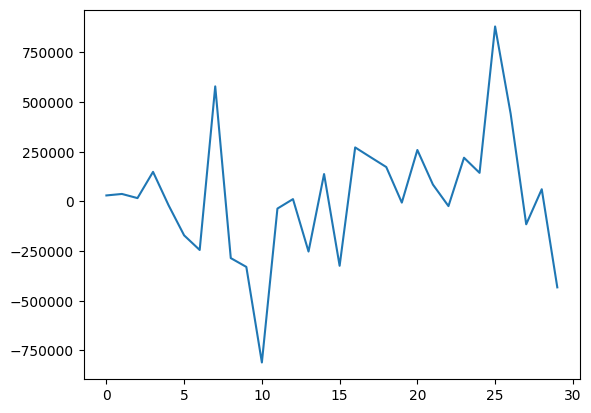

4080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


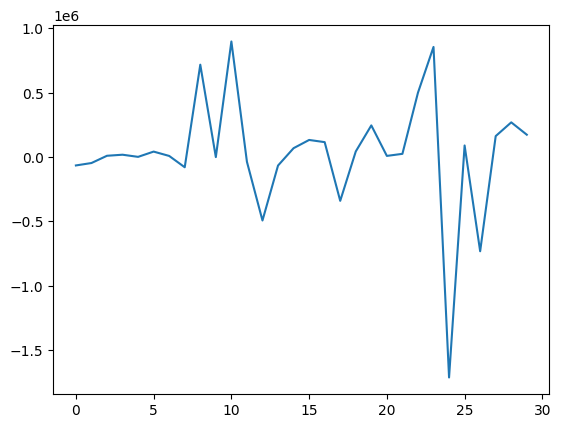

4800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


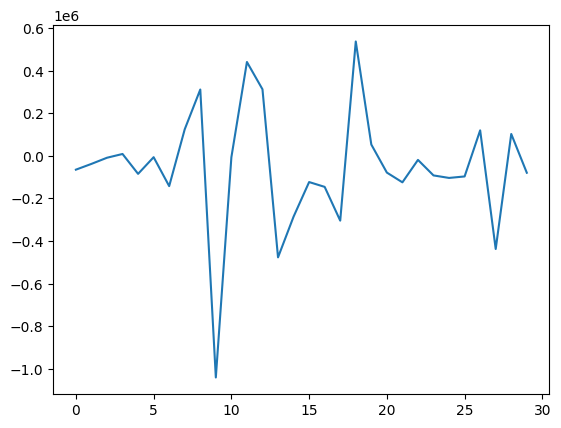

4080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


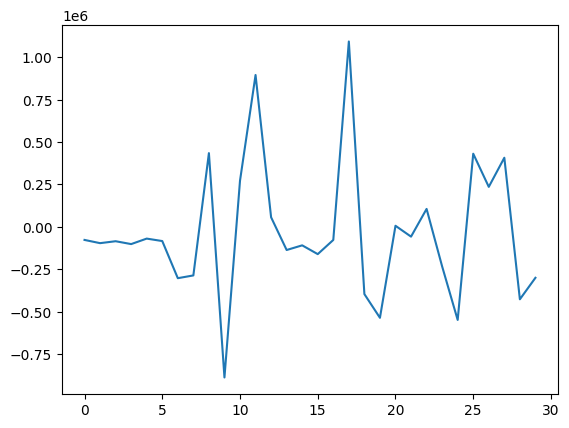

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


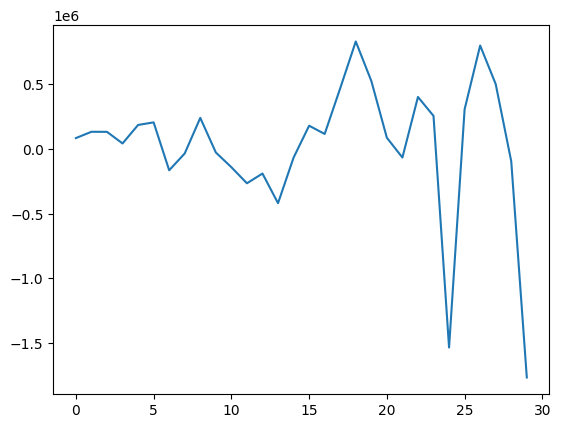

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


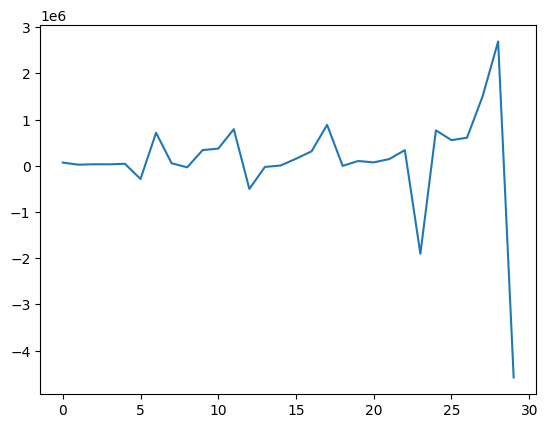

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


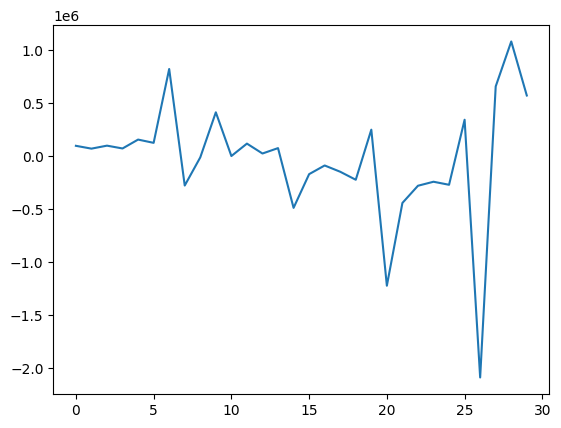

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


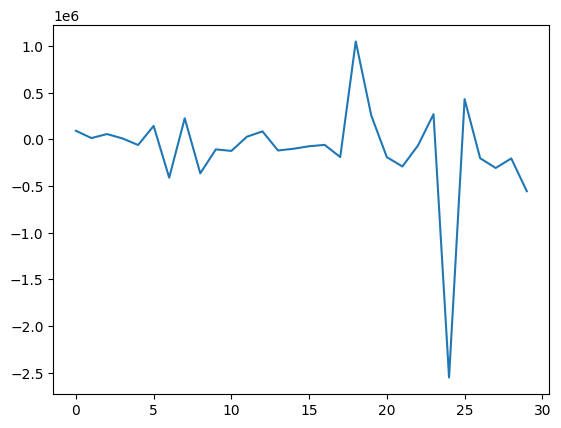

3361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


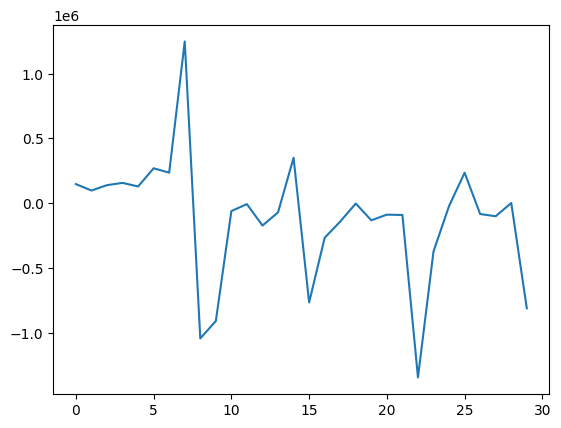

2399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


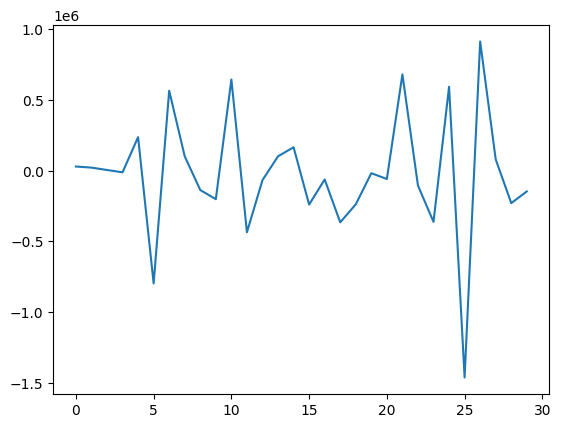

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


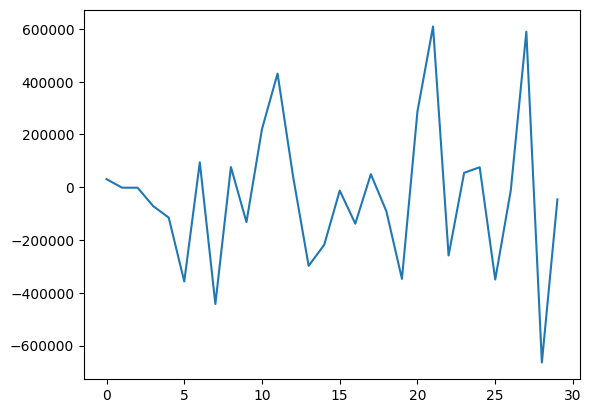

2881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


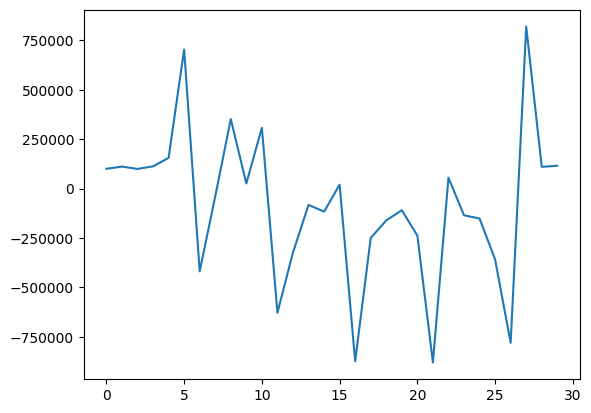

2400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


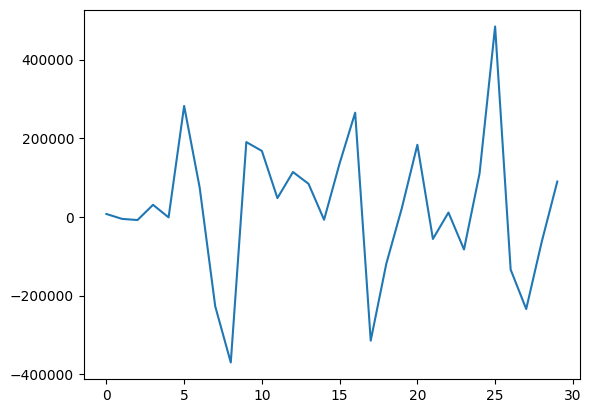

3840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


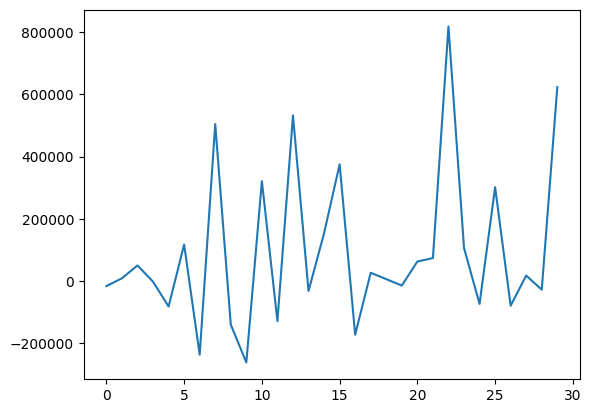

2640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


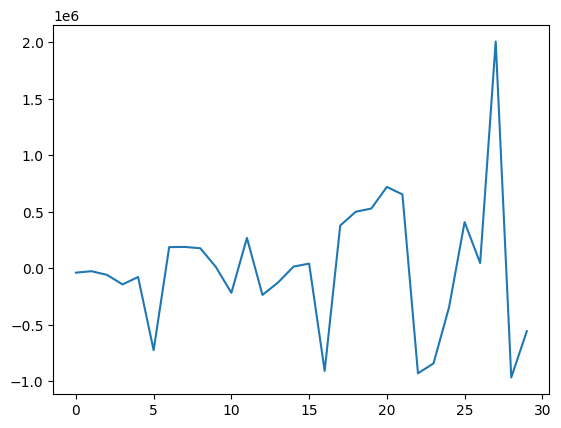

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


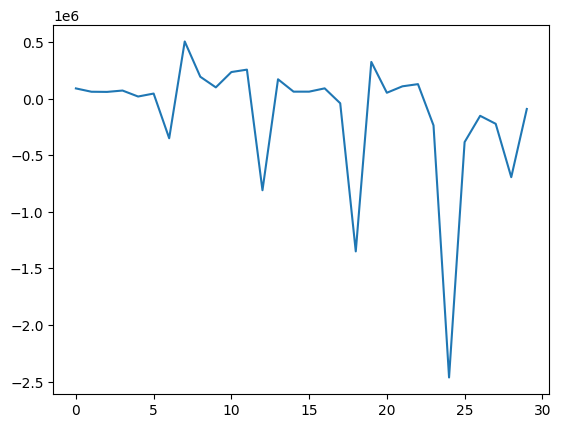

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


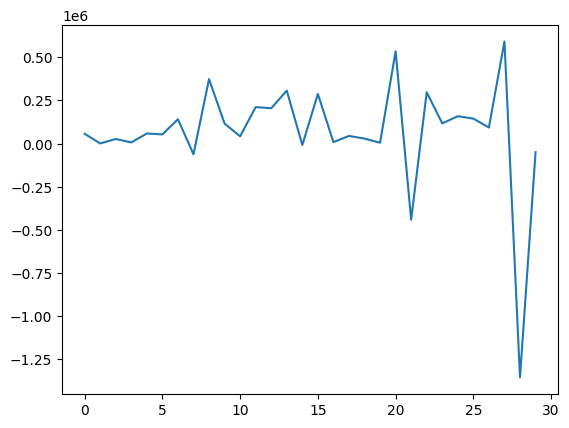

1440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


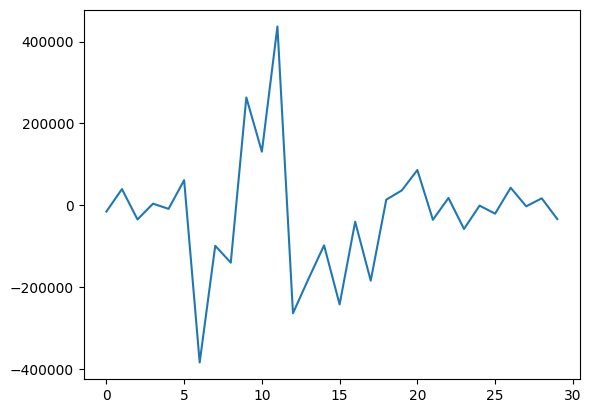

1920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


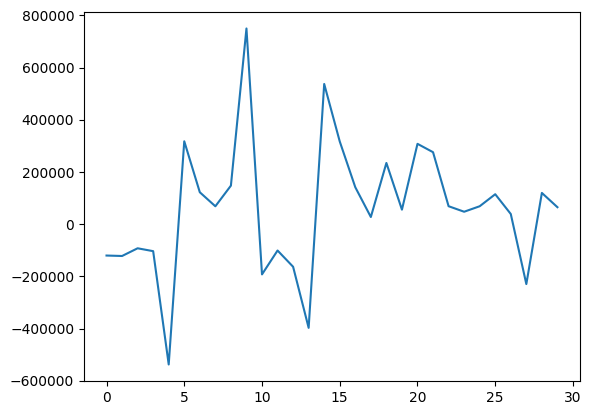

3600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


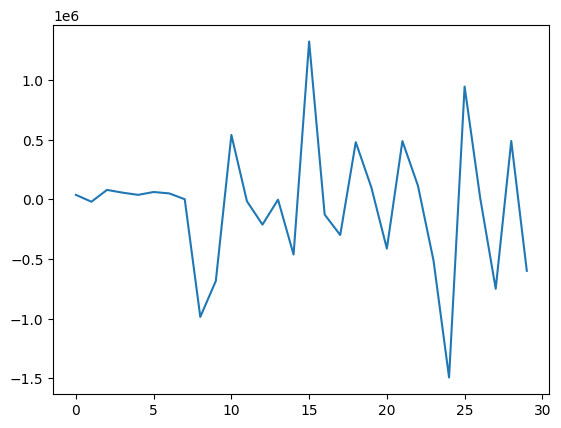

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


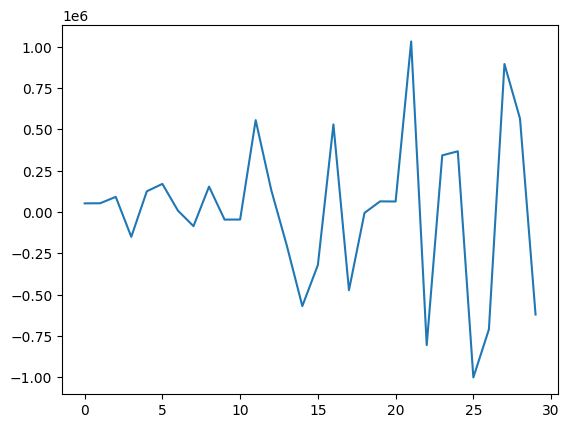

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


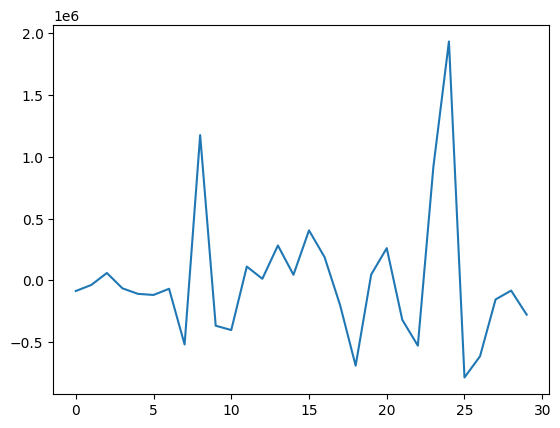

3359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


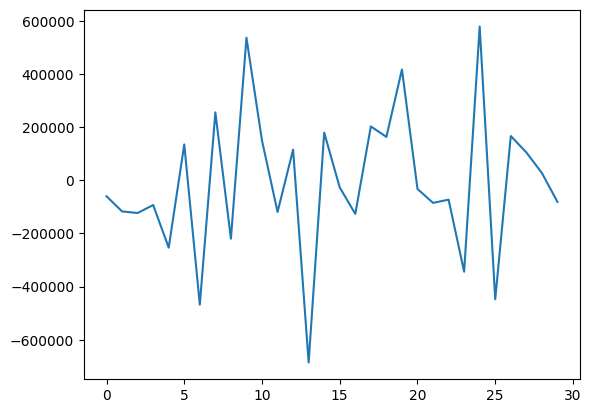

2641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


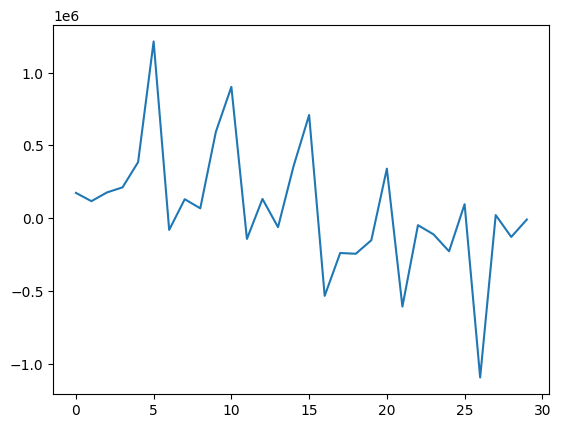

2399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


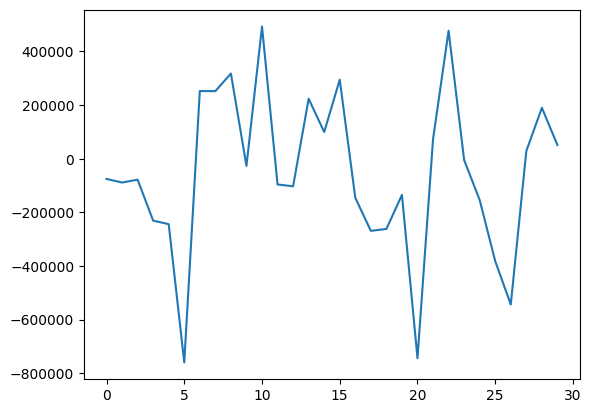

4320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


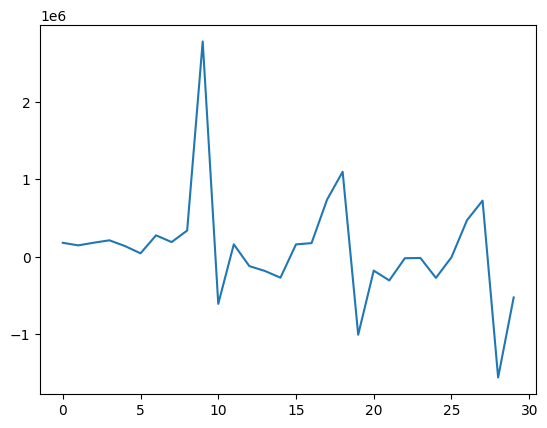

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


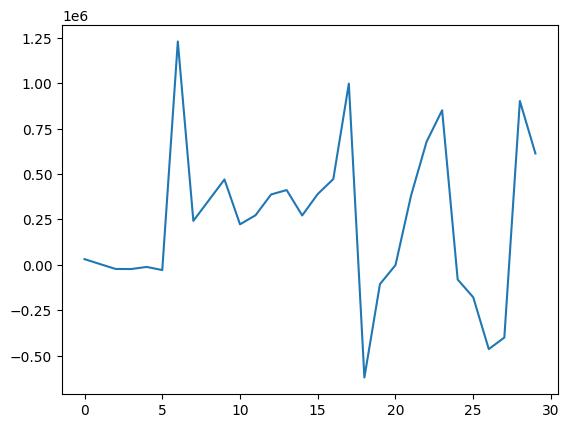

1440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


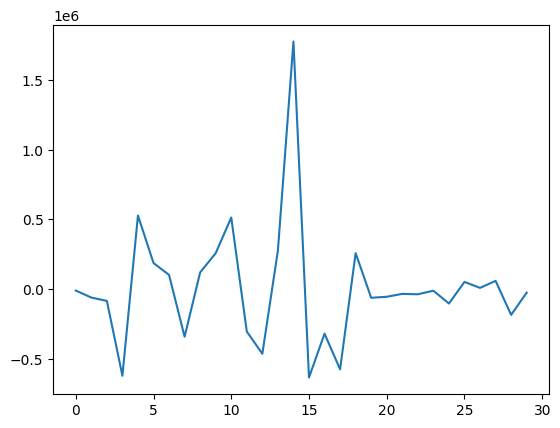

3840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


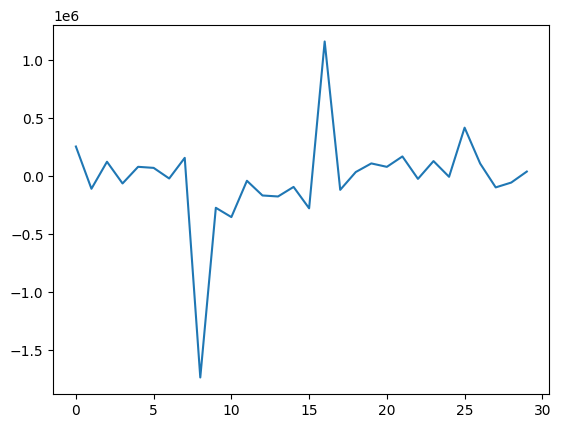

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


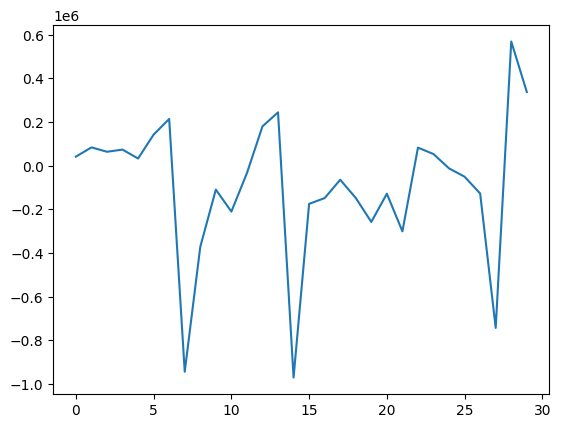

3361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


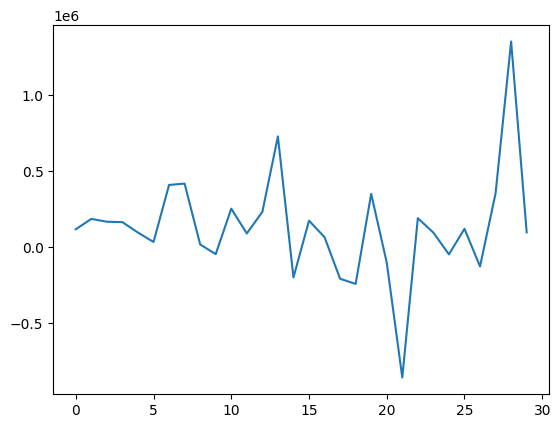

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


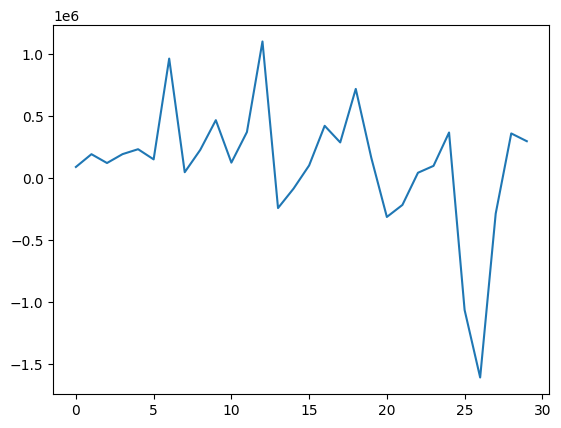

3360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


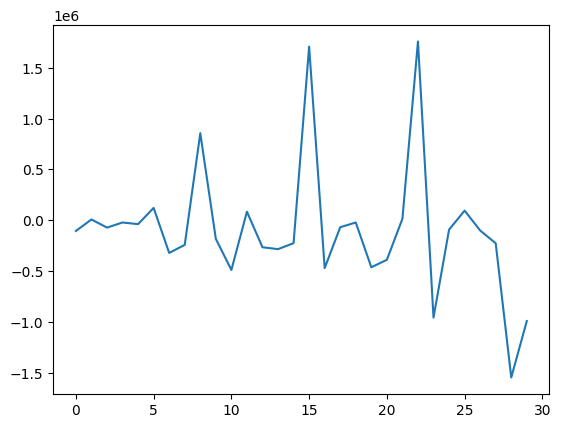

2880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


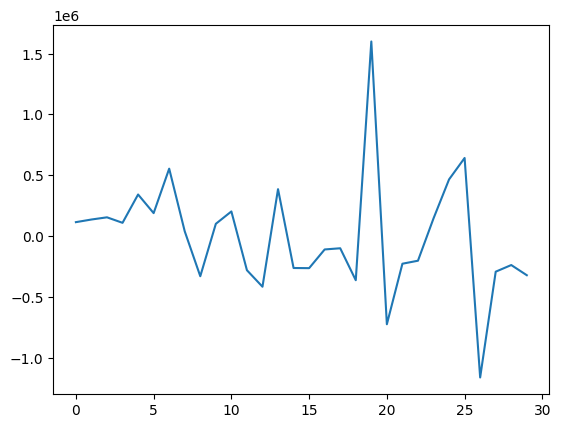

4800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


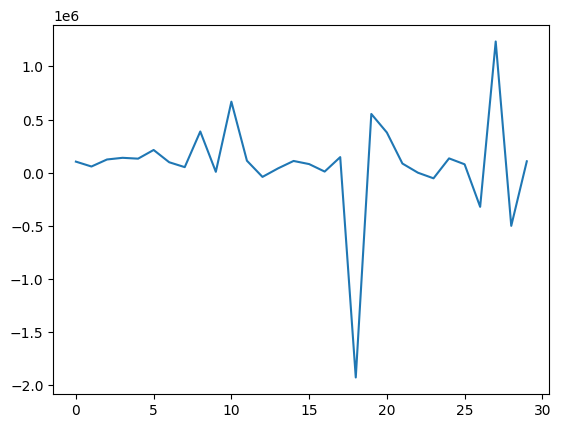

3120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


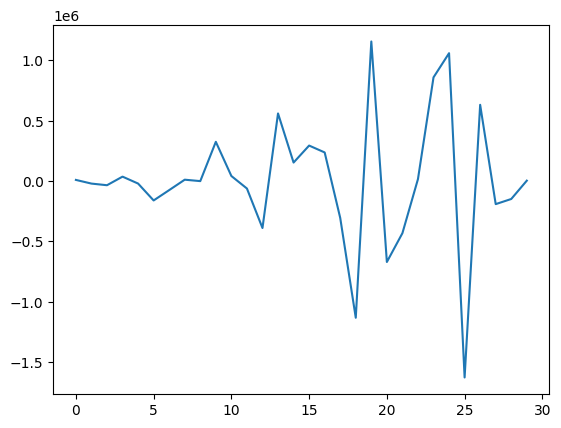

In [ ]:
def frequencia(muestra, Fs, muestraTotal):
    #print("Hola")
    #print(muestra * Fs / muestraTotal)

    return muestra * Fs/muestraTotal

def mostraFreq(freq, Fs, muestraTotal):
    return freq * muestraTotal / Fs

def grafic(y, mostres, cut_frequency):
   
   
    clf = svm.SVC()

    clf.fit(y, cut_frequency)
    #print(clf.fit(y, cut_frequency))
    y_pred = clf.predict(y)
    acc = accuracy_score(y, )

    print(acc)
    pass

#grafic(y, mostres, cut_frequency)

def resize_fft(fft_audio, mostres, cut_frequency):
    y = np.zeros(mostres, dtype = np.float32) #array del tamany de les mostres que li passes / tipus de mostra que envies (float32)
    print(y)
    sample_rate = int(cut_frequency / len(fft_audio))
    sample_to_take = len(fft_audio) / cut_frequency
    print(sample_to_take)
    #print(sample_rate)
    
    for i in range(mostres): #El primer recorre la finestra de mostres |____|____|____|____|
        for j in range(int(sample_to_take)): #El segon bucle et mira cada barreta del sample de dintre de cada mostra |_,_,_,_,_|_,_,_,_,_|_,_,_,_,_|_,_,_,_,_|
            #print(i*(sample_rate-1)+j) #0-300 100
            y[i] += fft_audio[i*sample_rate+j]
            #print(y)
    return np.array(y)

Fs, audio = sio.wavfile.read("/home/itibcn/Desktop/MachineLearningClassic/PracticaAudio/AudioClasse.wav")
#Fs, audio = cutvowel("vowels/alex.wav"), float(data[select]["start"]), float(data[select]["end"]))

for select in range(len(data)): #Parametre del dataset
    
    
    #print(data[select]['Vocal'])
    #print(' ')
    start = float(data[select]["Start"])
    #print(start)
    end=float(data[select]["End"])
    #print(end)
    #print(len(audio)) #per mirar si és estero o mono

    cut = audio[int(start*Fs):int(end*Fs)]

    #print("Llargada audio: " + str(len(cut)))
    #print(Fs)
    #print(type(audio))
    #print(type(audio[0]))

    #start=4.4 #realment ho agafariem del fitxer json
    #end=4.6

    #framesentrada = int(float(start)*Fs) #calculem la mostra d'entrada
    #framesalida = int(float(end)*Fs)
    #cut=audio[framesentrada:framesalida] #retallem

    #cut = audio
    #data[select]["vocal"]

    #print(' ')

    #Audio retallat
    Audio(cut, rate=Fs)

    #dibuixem l'audio retallat
    #plt.figure()
    #plt.plot(cut)
    #plt.title("")
    #plt.xlabel("time")
    #plt.ylabel("Amplitud")
    #plt.show()

    #Dificil entendre algo. mirem fourier
    fourier = fft(cut)

    
    #print(fourier)

    ##plt.figure()
    #plt.plot(fourier)
    #plt.title("FFT")
    #plt.xlabel("frequency")
    #plt.ylabel("Amplitud")
    #plt.show()

    #només importa el que pasa a prop de zero
    #Fsmall = fourier[0:300]
    Fsmall = fourier[0:int(mostraFreq(3000, Fs, len(cut)))]
    #plt.figure()
    #plt.plot(Fsmall)
    #plt.title("FFT")
    #plt.xlabel("frequency")
    #plt.ylabel("Amplitud")
    #plt.show()

    #No m'importa la fase, només el módul.
    toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))
    #plt.figure()
    #plt.plot(toprocess)
    #plt.show()

    print(len(cut))

    test = fourier
    resize = resize_fft(test, 30, len(cut))
    plt.figure()
    plt.plot(resize)
    plt.show()
    



#print(len(resize))


#-------------------------------------------------------------------------------------------------------------



1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


/tmp/ipykernel_7359/2262865941.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] += fft_audio[i*sample_rate+j]


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.95600000e+03 -2.05295801e+04 -3.40521055e+04  3.70451289e+04
 -2.02667305e+04 -1.60275047e+05 -7.45653594e+04  1.17723828e+04
 -6.33430939e+01  3.25604844e+05  4.22731953e+04 -6.13021680e+04
 -3.88623281e+05  5.60691312e+05  1.53732672e+05  2.94513938e+05
  2.37537234e+05 -3.04794531e+05 -1.13219312e+06  1.15692725e+06
 -6.70205188e+05 -4.31383438e+05  1.66668242e+04  8.59556375e+05
  1.05996100e+06 -1.62699700e+06  6.32286750e+05 -1.90706609e+05
 -1.48132453e+05  3.79521924e+03  1.08634938e+05 -2.33699891e+05
  3.07521344e+05 -3.88819609e+04 -2.94582397e+03 -4.85602344e+04
  5.82190078e+04  3.12095996e+04  3.69851836e+04 -5.19713125e+04
 -6.16204688e+04 -4.55045859e+04  7.86979053e+03  3.38379023e+04
 -2.70283340e+04  2.25138945e+04 -3.08192305e+04  1.07394922e+04
  6.98052344e+04  2.45028848e+04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Dificil entendre algo. mirem fourier

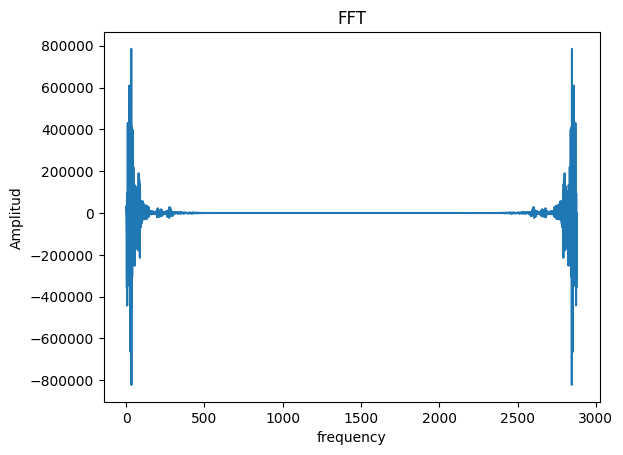

només m'importa el que pasa a prop de zero

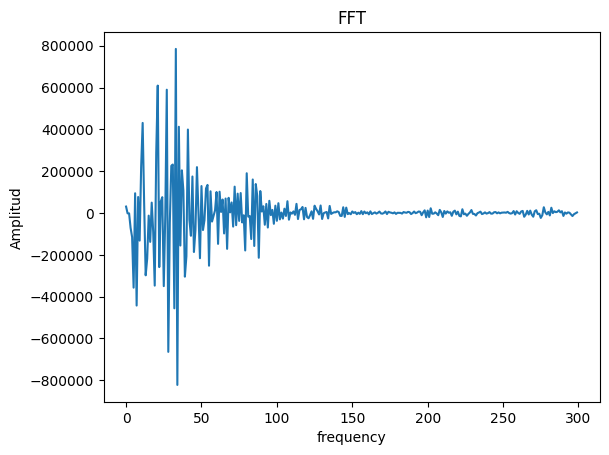

No m'importa la fase, només el módul.


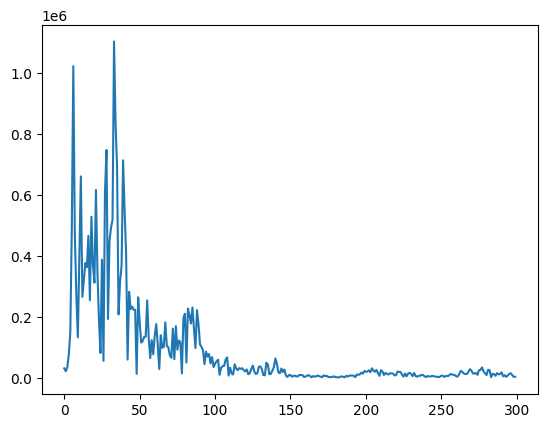

Aplico un filtre per quedar eliminar soroll

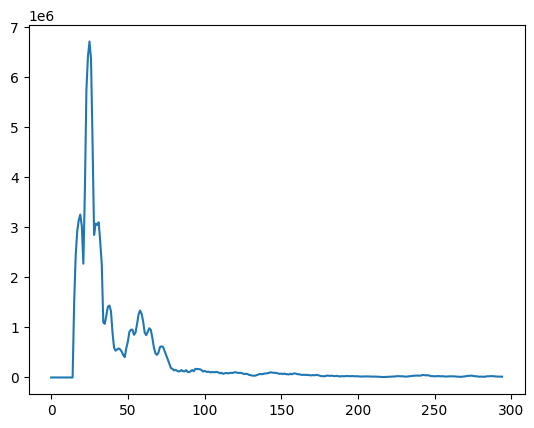

25

25


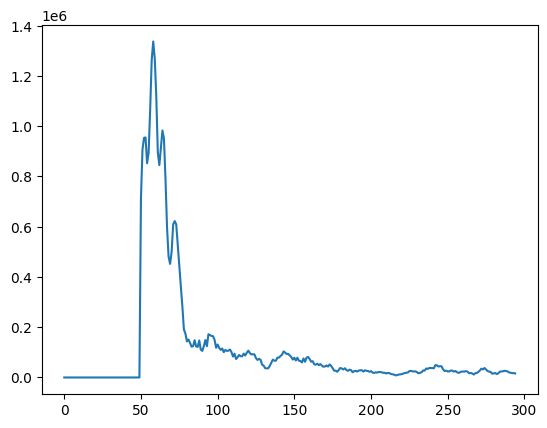

58


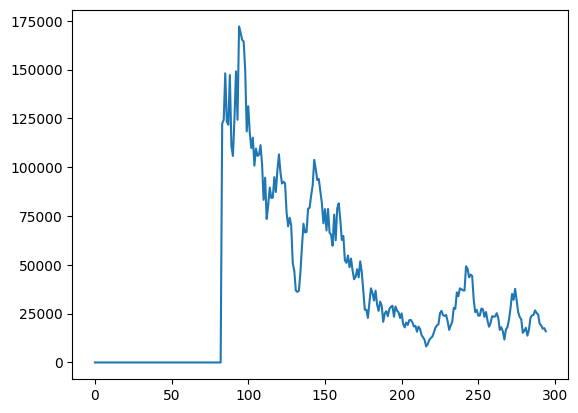

94


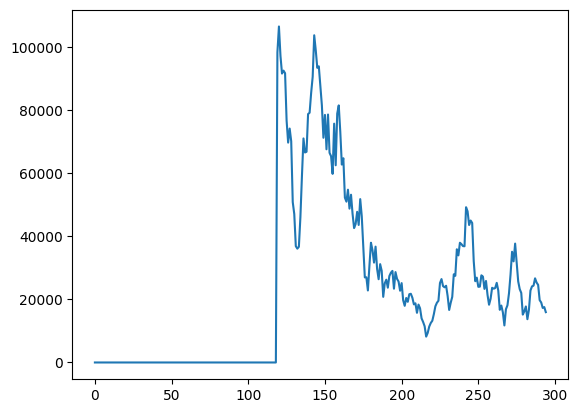

2880
48000
416.6666666666667 Hz
966.6666666666666 Hz
1566.6666666666667 Hz
